In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#**1. Understanding the Dataset**



In [36]:
#Loading the data
tt = pd.read_csv(r'/content/drive/My Drive/Data Analytics/Titanic_Data_Analysis/titanic.csv')
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
#Checking to see the size of the dataset
tt.shape

(891, 12)

In [38]:
#Checking to see the names of the columns
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **2. Data Preprocessing**

---

In [39]:
#After taking a glance at the csv file, I noticed that there is missing values in the 'Age' column
tt['Age'].iloc[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [40]:
#There is also missing values in the 'Cabin' column
tt['Cabin'].iloc[:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [41]:
#As well as the 'Embarked' columns having missing values
tt['Embarked'].iloc[59:80]

59      S
60      C
61    NaN
62      S
63      S
64      C
65      C
66      S
67      S
68      S
69      S
70      S
71      S
72      S
73      C
74      S
75      S
76      S
77      S
78      S
79      S
Name: Embarked, dtype: object

In [42]:
#To fix the missing 'Age' Values, i will replace all NaN values with the mean age value. This will preserve the data and will help mintain the overall distribution/relationships within the data.
mean_age = tt['Age'].mean()
tt['Age'] = tt['Age'].fillna(mean_age)


In [43]:
#I will also define age ranges and labels for the age groups and create a new column 'AgeGroup' based on the age ranges
age_bins = [0, 18, 30, 50, 100]
age_labels = ['0-17', '18-29', '30-49', '50+']

tt['AgeGroup'] = pd.cut(tt['Age'], bins=age_bins, labels=age_labels)
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,18-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30-49
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,18-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30-49
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,30-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,18-29
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,18-29
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,18-29
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,18-29


In [44]:
#Since 'Embarked' is a categorical feature I will replace missing values with the mode (most common value) of the column
mode_embarked = tt['Embarked'].mode()[0]
print('The mode is:', mode_embarked)
tt['Embarked'] = tt['Embarked'].fillna(mode_embarked)
tt['Embarked'][59:80]

The mode is: S


59    S
60    C
61    S
62    S
63    S
64    C
65    C
66    S
67    S
68    S
69    S
70    S
71    S
72    S
73    C
74    S
75    S
76    S
77    S
78    S
79    S
Name: Embarked, dtype: object

In [45]:
#As for the 'Cabin' column, I will create a binary column called 'CabinCode' where if the passenger has a cabin, the value is 1 and if they didn't, the value is 0
#This can maybe allow me to capture any patterns (if any) associated with passengers who have cabin information
tt['CabinCode'] = 0
tt.loc[tt['Cabin'].notnull(), 'CabinCode'] = 1

In [46]:
#I will also insert two binary columns for the 'Gender' and 'Embarked' columns
tt.insert(5,'GenderCode',pd.Categorical(tt['Sex']).codes)
tt.insert(13,'EmbarkedCode',pd.Categorical(tt['Embarked']).codes)

In [47]:
#Checking the columns to see if they are correctly displayed
tt[['Sex','GenderCode','Cabin','CabinCode','Embarked','EmbarkedCode']]

,Sex,GenderCode,Cabin,CabinCode,Embarked,EmbarkedCode
0,male,1,NaN,0,S,2
1,female,0,C85,1,C,0
2,female,0,NaN,0,S,2
3,female,0,C123,1,S,2
4,male,1,NaN,0,S,2
...,...,...,...,...,...,...
886,male,1,NaN,0,S,2
887,female,0,B42,1,S,2
888,female,0,NaN,0,S,2
889,male,1,C148,1,C,0


# **3. Exploratory Data Analysis (EDA)**

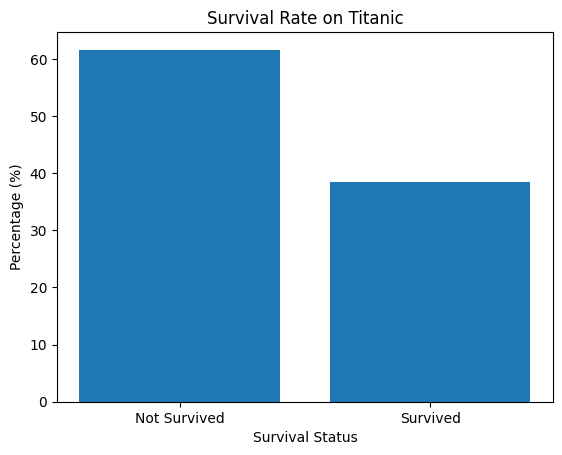

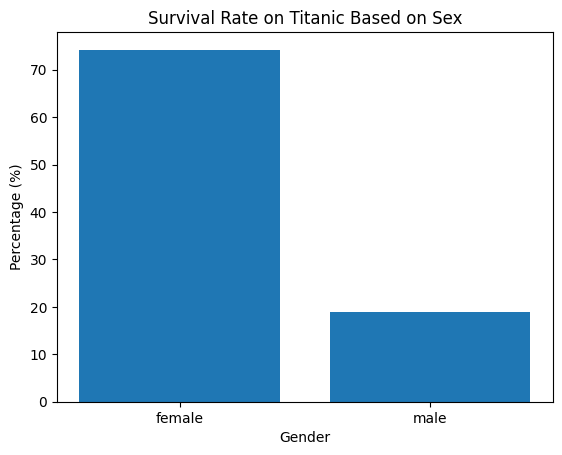

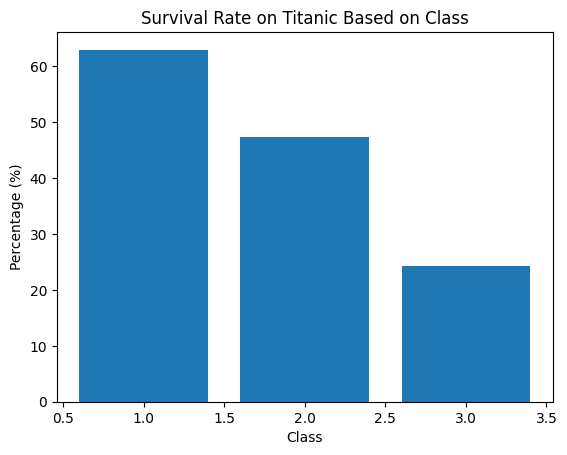

In [48]:
# Create a bar plot showing the count of passengers who survived and those who did not. This provides an initial overview of the survival distribution.

survival_rates = tt['Survived'].value_counts(normalize=True) * 100

plt.bar(survival_rates.index, survival_rates.values, tick_label=['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Percentage (%)')
plt.title('Survival Rate on Titanic')
plt.show()


#Based on Sex
survival_by_gender = tt.groupby('Sex')['Survived'].sum()
total_passengers_by_gender = tt['Sex'].value_counts()

survival_rates_by_gender = (survival_by_gender / total_passengers_by_gender) * 100
survival_rates_by_gender

plt.bar(survival_rates_by_gender.index, survival_rates_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Survival Rate on Titanic Based on Sex')
plt.show()


#Based on Class

survival_by_class = tt.groupby('Pclass')['Survived'].sum()
total_passengers_by_class = tt['Pclass'].value_counts()

survival_rates_by_class = (survival_by_class / total_passengers_by_class) * 100

plt.bar(survival_rates_by_class.index, survival_rates_by_class.values)
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.title('Survival Rate on Titanic Based on Class')
plt.show()

*   Roughly 40% of the passengers survived.

*   Over 70% of the women survived whereas roughly 20% of men survived. This makes us question the roles both genders played during the incidentList item

*   First class passengers had a higher rate of survival compared to second and third class respectively. This is obvious and expected.

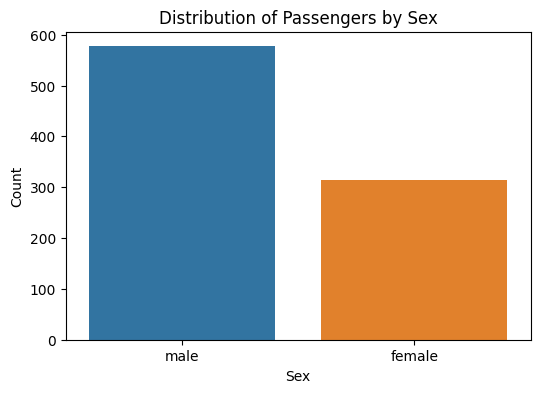

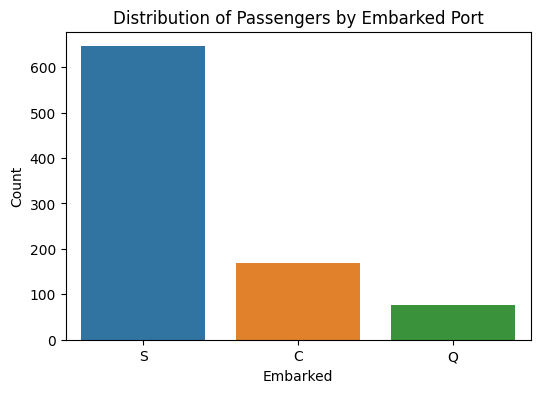

In [49]:
#Count plot fot 'Sex'

plt.figure(figsize=(6, 4))
sns.countplot(data=tt, x='Sex', order=tt['Sex'].value_counts().index)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Sex')
plt.show()



#Count plot fot 'Embarked'

plt.figure(figsize=(6, 4))
sns.countplot(data=tt, x='Embarked', order=tt['Embarked'].value_counts().index)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Embarked Port')
plt.show()



*   Ratio of male to female is almost 2:1. Interesting to see that while there is this signigicant number of male compared to female, the females had a higher rate of survival.

*   Strong majority of passengers embarked at Southampton, the port that embarked passengers with the lowest survival rate.



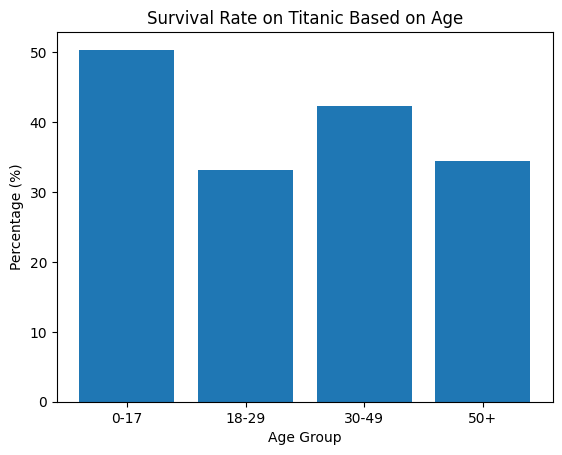

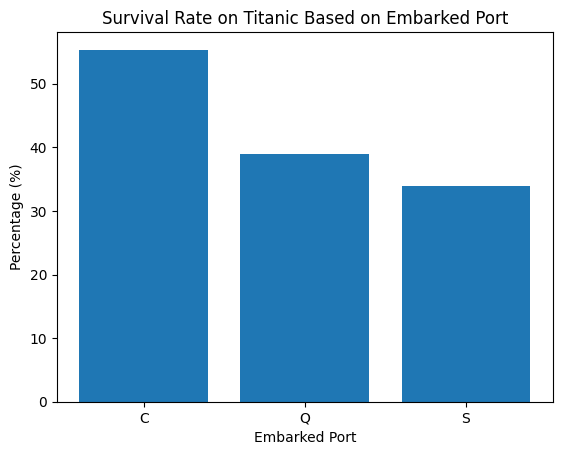

<ipython-input-50-f8111063c582>:37: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_survival_rates = survival_rates.pivot('SibSp', 'Parch', 'Survived')


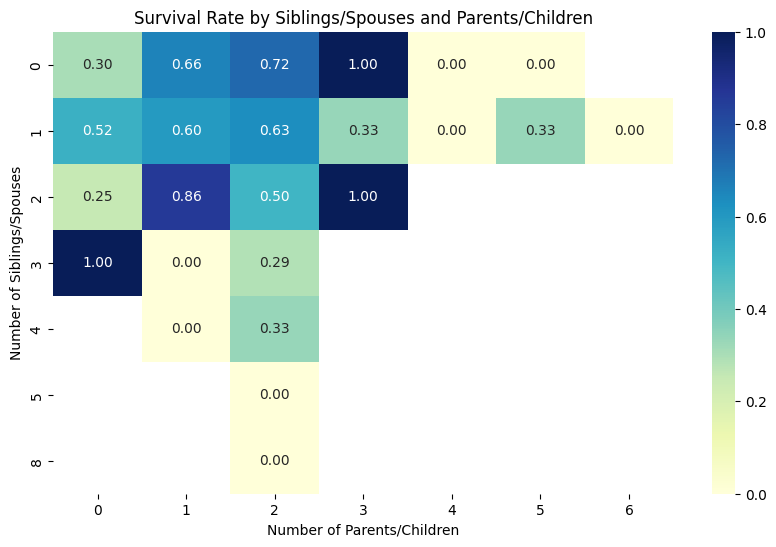

In [50]:
#Based on Age

survival_by_age = tt.groupby('AgeGroup')['Survived'].sum()
total_passengers_by_age = tt['AgeGroup'].value_counts()

survival_rates_by_age = (survival_by_age / total_passengers_by_age) * 100

plt.bar(survival_rates_by_age.index, survival_rates_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.title('Survival Rate on Titanic Based on Age')
plt.show()


#Based on Embarked Port

survival_by_port = tt.groupby('Embarked')['Survived'].sum()
total_passengers_by_port = tt['Embarked'].value_counts()

survival_rates_by_port = (survival_by_port / total_passengers_by_port) * 100

plt.bar(survival_rates_by_port.index, survival_rates_by_port.values)
plt.xlabel('Embarked Port')
plt.ylabel('Percentage (%)')
plt.title('Survival Rate on Titanic Based on Embarked Port')
plt.show()

#By siblings/spouses and parents/children

survival_by_family = tt.groupby(['SibSp', 'Parch'])['Survived'].sum()
total_passengers_by_family = tt.groupby(['SibSp', 'Parch'])['PassengerId'].count()

# Calculate survival rates as the number of survivors divided by the total passengers
survival_rates = tt.groupby(['SibSp', 'Parch'])['Survived'].mean().reset_index()

# Pivot the data for better visualization
pivot_survival_rates = survival_rates.pivot('SibSp', 'Parch', 'Survived')

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_survival_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel('Number of Parents/Children')
plt.ylabel('Number of Siblings/Spouses')
plt.title('Survival Rate by Siblings/Spouses and Parents/Children')
plt.show()



*   Interesting results. First we see that the 0-17 age group has the highest surivival rate (~50%). This could suggest that children were prioritized to be saved. Maybe parents were putting their lives at risk for them

*   We also see that those who embarked from Cherbourg, France had a higher survival rate compated to those who embarked from Queenstown, Ireland and Southampton, England

*   For the heatmap, we see that those who had 0-2 siblings or spouses and 1-3 parents or children had a high surivival rate






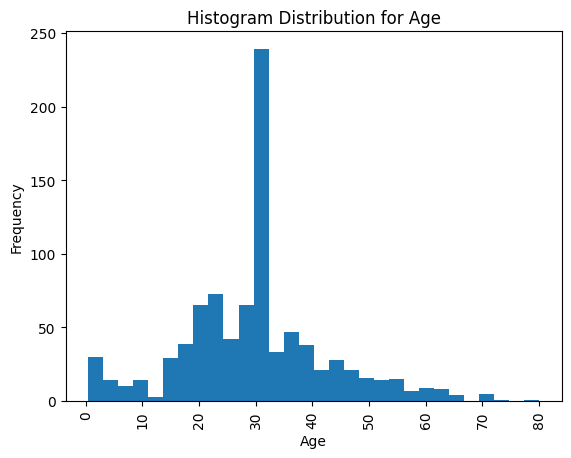

29.69911764705882


In [51]:
#Age Distribution Histogram
plt.hist(tt['Age'], bins = int(np.ceil(np.sqrt(len(tt)))))
plt.xticks(rotation = 'vertical')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram Distribution for Age')
plt.show()
print(mean_age)



*   We see that passengers mostly ranged from their 20s to their 40s ish. The big jump in the 30s is due to filling up all of the NaN ages to the mean age.



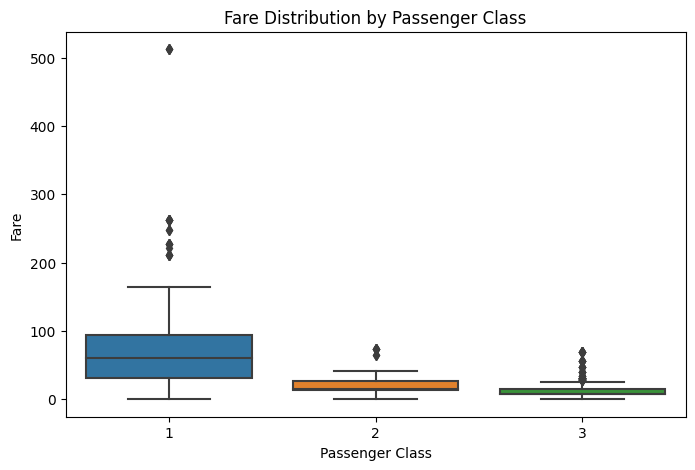

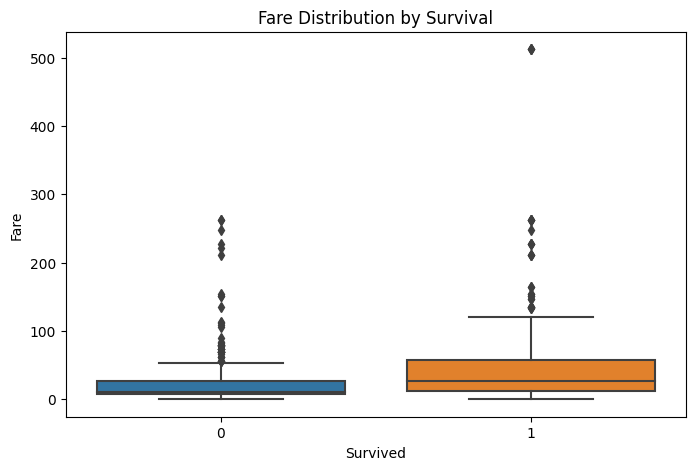

In [52]:
#Box plot to visualize the fare distribution across passenger classes
plt.figure(figsize=(8, 5))
sns.boxplot(data=tt, x='Pclass', y='Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()


#Box plot to visualize the fare distribution across passenger classes
plt.figure(figsize=(8, 5))
sns.boxplot(data=tt, x='Survived', y='Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival')
plt.show()



*   Intuitive that passengers payed a higher fare in first class compared to second and third class respectively.

*   Seems like those who payed a higher fare were more likely to survive. Makes sense since those who were in first class payed the most and were more likely to survive.

*   The passengers that payed the most managed to survive..I guess money well spent!

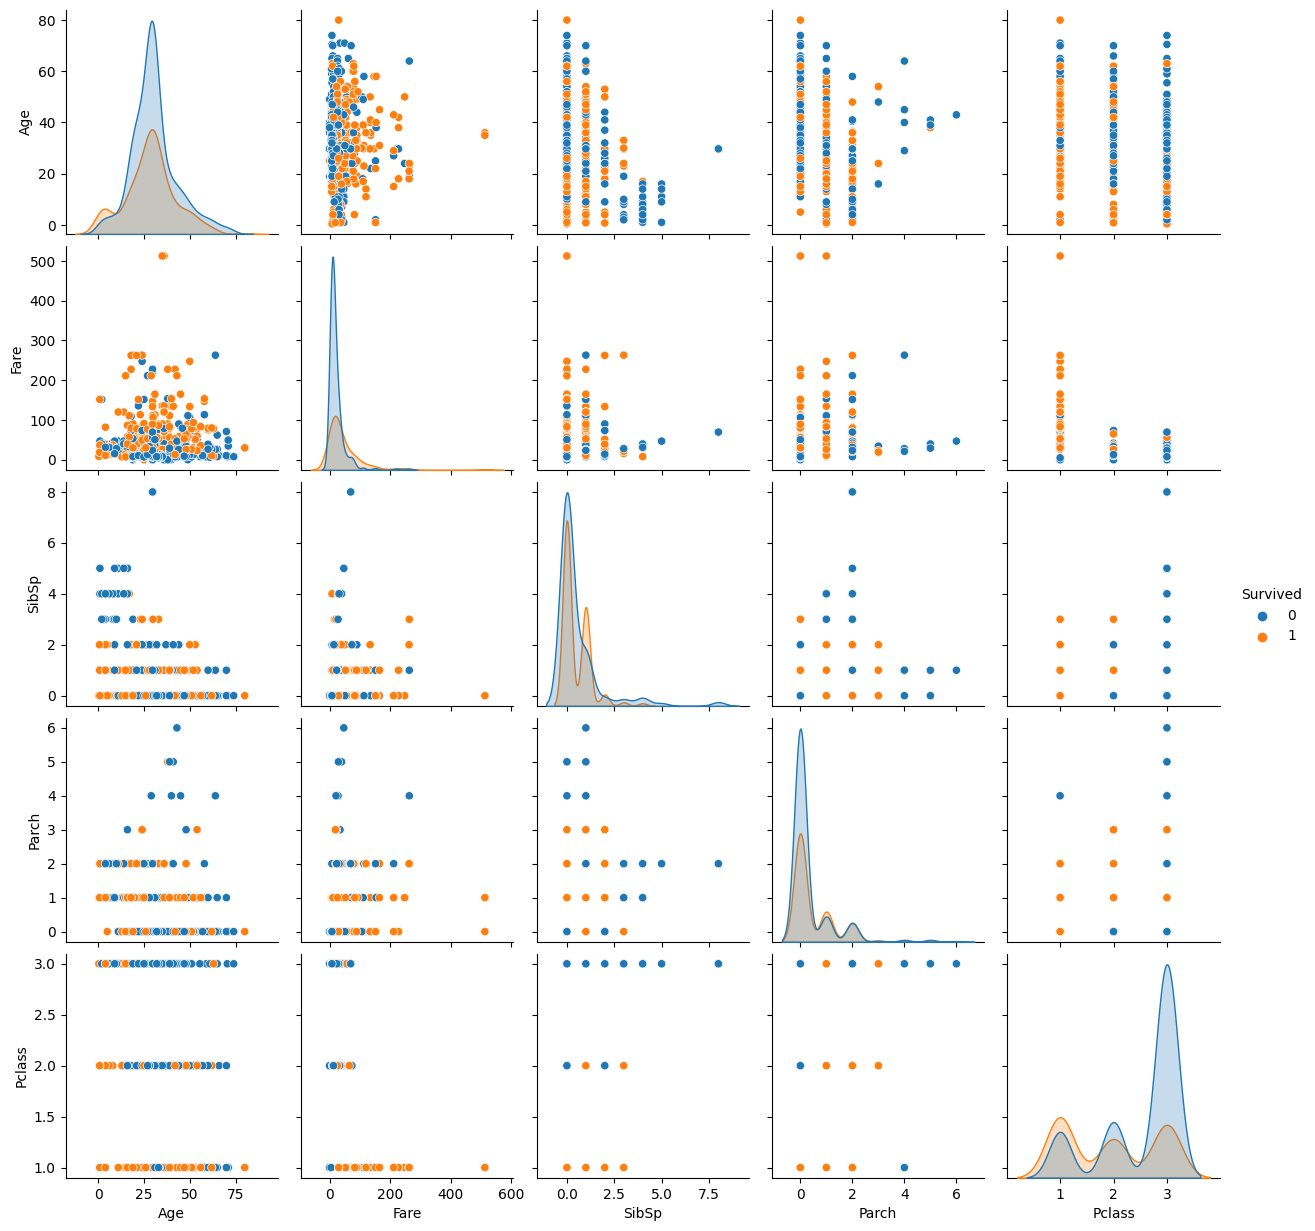

In [53]:
#Select numerical columns for the pair plot
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

#Create the pair plot using Seaborn
sns.pairplot(data=tt, vars=numerical_columns, hue='Survived', diag_kind='kde')



*   As Pclass vs, Age, Fare SibSp and Parch suggest that there isnt a strong linear correlation.

*   In other words, the distribution of ages, Fare/SibSp&Parch among different passenger classes doesn't follow a clear pattern where higher or lower class passengers are consistently older or younger.

*   Individuals of various ages were present in all passenger classes, without a dominant age-related trend.

*   Higher passenger class (lower numerical value for 'Pclass', e.g., 1st class) corresponds to higher ticket fares ('Fare').

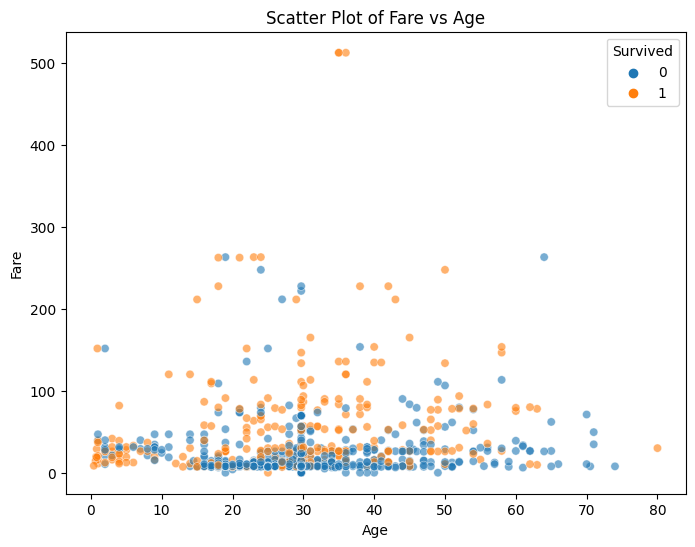

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tt, x='Age', y='Fare', hue='Survived', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs Age')
plt.legend(title='Survived', loc='upper right')
plt.show()



*   It is safe to say that how much a passenger payed for their ticket is not necessarily correlated to their age.

*   We do see though that as Fare increases, the chance of survival increases as well.

*   Only children between 0-10 had a high survival rate regardless of the price of their fare.

# **4. Feature Engineering**
The dataset includes basic information about passengers, such as their age, gender, class, and survival status. However, by engineering features, I aim to extract deeper insights that can enhance our understanding of survival patterns which could improve prediction accuracy.

The goal of feature engineering is to uncover subtle patterns that affect survival rates beyond the obvious attributes.

In [55]:
#Create column for Name titles to get info on social status
tt['Title'] = tt['Name'].str.split(' ').str[1]

#Seems like there are a lot of titles where many only a few people have. I will group these rare titles together under "Other" to reduce dimensionality of the column
tt['Title'].value_counts()

common_titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.']

tt['Title'] = tt['Title'].apply(lambda x: x if x in common_titles else 'Other')

#Add TitleCode column as well
tt.insert(13,'TitleCode',pd.Categorical(tt['Title']).codes)

In [56]:
#Combine 'SibSp' and 'Parch' to create a new feature representing the total family size. Larger families might have had different survival rates.
tt['FamilySize'] = tt['SibSp'] + tt['Parch'] + 1

In [57]:
#Whether a passenger was traveling alone
tt['Alone or Not'] = tt.apply(lambda row: 1 if row['SibSp'] == 0 and row['Parch'] == 0 else 0, axis = 1)

In [58]:
#This might provide insights into fare distributions within families.
tt['FarePerPerson'] = tt['Fare'] / tt['FamilySize']

In [59]:
#Extract the deck letter from the 'Cabin' feature if available. This could indicate the location on the ship and might correlate with survival.
tt['Deck From Cabin'] = tt['Cabin'].str.split('').str[1]

In [60]:
#Create a column to  get the prefixes of the tickets could provide additional information about the type of ticket or cabin class
tt['TicketPrefix'] = tt['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'NoPrefix')
tt

,PassengerId,Survived,Pclass,Name,Sex,GenderCode,Age,SibSp,Parch,Ticket,...,TitleCode,EmbarkedCode,AgeGroup,CabinCode,Title,FamilySize,Alone or Not,FarePerPerson,Deck From Cabin,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,...,2,2,18-29,0,Mr.,2,0,3.62500,NaN,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,...,3,0,30-49,1,Mrs.,2,0,35.64165,C,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,...,1,2,18-29,0,Miss.,1,1,7.92500,NaN,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,...,3,2,30-49,1,Mrs.,2,0,26.55000,C,NoPrefix
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,...,2,2,30-49,0,Mr.,1,1,8.05000,NaN,NoPrefix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,...,4,2,18-29,0,Other,1,1,13.00000,NaN,NoPrefix
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,...,1,2,18-29,1,Miss.,1,1,30.00000,B,NoPrefix
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,...,1,2,18-29,0,Miss.,4,0,5.86250,NaN,W./C.
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,...,2,0,18-29,1,Mr.,1,1,30.00000,C,NoPrefix


In [61]:
#How many times a particular ticket appears in the dataset. Passengers sharing the same ticket might have some correlation.
frequency = tt['Ticket'].value_counts()

tt['TicketFrequency'] = tt['Ticket'].map(frequency)

In [62]:
# Define fare ranges and labels for the fare groups
fare_bins = [0, 20, 40, 60, 80, 100, 200, 300, 600]
fare_labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-200', '201-300', '301-600']

# Create a new column 'FareRanges' based on fare ranges
tt['FareRanges'] = pd.cut(tt['Age'], bins=fare_bins, labels=fare_labels)
tt

,PassengerId,Survived,Pclass,Name,Sex,GenderCode,Age,SibSp,Parch,Ticket,...,AgeGroup,CabinCode,Title,FamilySize,Alone or Not,FarePerPerson,Deck From Cabin,TicketPrefix,TicketFrequency,FareRanges
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,...,18-29,0,Mr.,2,0,3.62500,NaN,A/5,1,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,...,30-49,1,Mrs.,2,0,35.64165,C,PC,1,21-40
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,...,18-29,0,Miss.,1,1,7.92500,NaN,STON/O2.,1,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,...,30-49,1,Mrs.,2,0,26.55000,C,NoPrefix,2,21-40
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,...,30-49,0,Mr.,1,1,8.05000,NaN,NoPrefix,1,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,...,18-29,0,Other,1,1,13.00000,NaN,NoPrefix,1,21-40
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,...,18-29,1,Miss.,1,1,30.00000,B,NoPrefix,1,0-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,...,18-29,0,Miss.,4,0,5.86250,NaN,W./C.,2,21-40
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,...,18-29,1,Mr.,1,1,30.00000,C,NoPrefix,1,21-40


In [63]:
# Calculate survival rate for each family group
family_survival_rate = tt.groupby('Ticket')['Survived'].mean()

# Map the family survival rate to each passenger using 'Ticket' as the key
tt['FamilySurvivalRate'] = tt['Ticket'].map(family_survival_rate)

In [71]:
#Finally, I want to see which features are highly correlated to the 'Survived column
tt.corr()['Survived']

<ipython-input-71-1cad113b5c29>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tt.corr()['Survived']


PassengerId          -0.005007
Survived              1.000000
Pclass               -0.338481
GenderCode           -0.543351
Age                  -0.069809
SibSp                -0.035322
Parch                 0.081629
Fare                  0.257307
TitleCode            -0.069073
EmbarkedCode         -0.167675
CabinCode             0.316912
FamilySize            0.016639
Alone or Not         -0.203367
FarePerPerson         0.221600
TicketFrequency       0.038247
FamilySurvivalRate    0.927549
Name: Survived, dtype: float64


*   'GenderCode', 'PClass', 'EmbarkedCode' and 'Alone or Not' are features that are relatively, negatively correlated.
*   'Fare', 'CabinCode', 'FarePerPerson' and of course 'FamilySurvivalRate' are features that are relatively, postively correlated.



# **5. Data Visualization**

This section provides further data visualizations to uncover relationships between variables, observe survival trends based on factors like gender, class, title and age, and gain a deeper understanding of the dataset's nuances.

<ipython-input-64-04abe3979a30>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tt.corr()


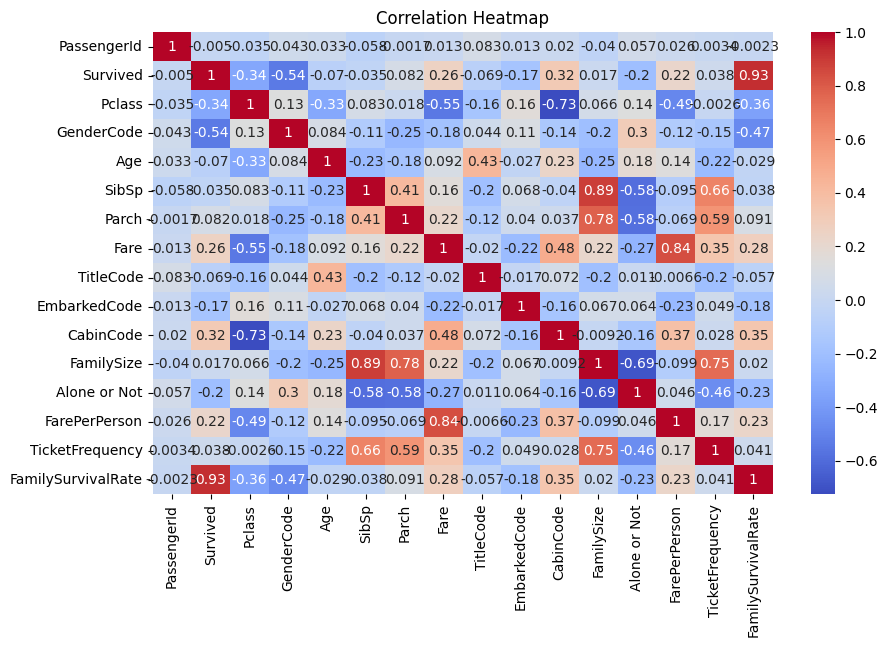

In [64]:
# Creating a correlation heatmap to visualize the relationships between numeric features

# Calculate the correlation matrix
correlation_matrix = tt.corr()

# Create the correlation heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




*   Interestingly enough, we see that the 'Alone or Not' feature is positively correlated to 'GenderCode'.
*   'Age' is also positively correlated to 'TitleCode'.
*   'CabinCode' is positively correlated to 'Fare'.
*   'CabinCode' and 'PClass' are negatively correlated. I think this suggests that missing cabin code is related to class. The bigger the PClass number (i.e. 2nd or 3rd class), the more likely cabin code is missing. A deeper look can be done to see if a missing cabin code had something to do with socio-economic factors.



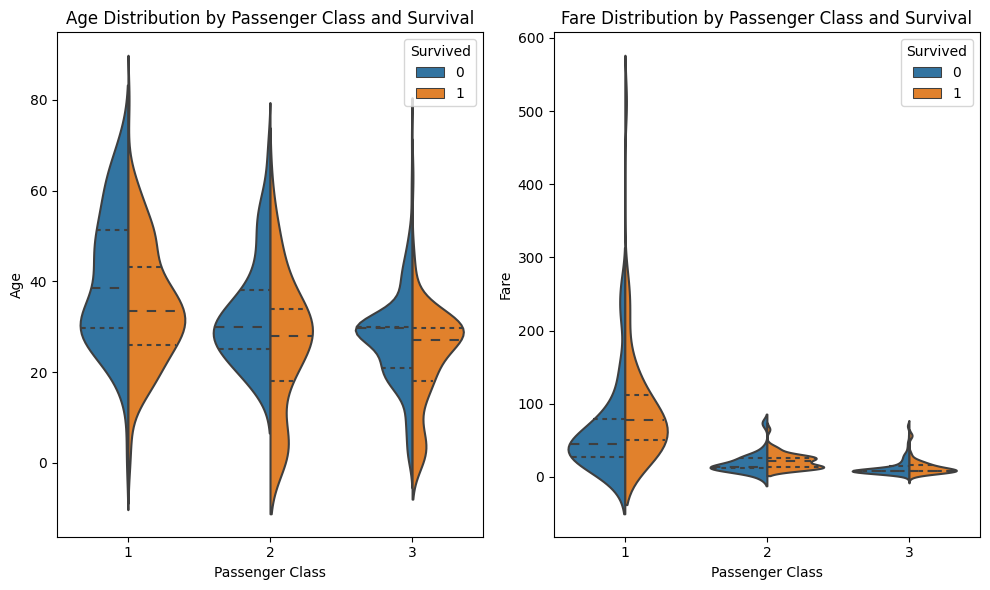

In [74]:
# Create violin plots
plt.figure(figsize=(10, 6))

# Violin plot for 'Age' by 'Pclass'
plt.subplot(1, 2, 1)
sns.violinplot(data=tt, x='Pclass', y='Age', hue='Survived', split=True, inner='quartiles')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class and Survival')

# Violin plot for 'Fare' by 'Pclass'
plt.subplot(1, 2, 2)
sns.violinplot(data=tt, x='Pclass', y='Fare', hue='Survived', split=True, inner='quartiles')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class and Survival')

plt.tight_layout()
plt.show()


**Age Distribution by Passenger Class and Survival**
1.   Class 1: The distributions indicate that passengers who are older survived less than the younger ones. This makes sense as younger passengers are more agile and can evacuate faster. 1st Class seemed to have the older passengers aboard.

2.   Class 2: Passengers who are older survived less than the younger ones. 2nd Class has a younger population than the 1st class.

3.   Class 3: This class has the youngest passengers aboard. Again, the passengers who are older survived less than the younger ones.

Looking at the difference in ages for each class, this could suggest that the older passengers have a higher social and socio-economic class.


**Fare Distribution by Passenger Class and Survival**
1.   Class 1: The distributions indicate that passengers who payed less, survived less than those who payed more. This makes intuitive sense.

2.   Class 2 & 3: 2nd and 3rd class distributions are strange because although it seems like passengers who payed less, survived less than those who payed more, it is not as obvious as in the 1st class. This could suggest that regardless of the price payed in these 2 classes, the tickets were of similar "quality" and it made little to no difference in terms of survivability.




<Figure size 800x600 with 0 Axes>

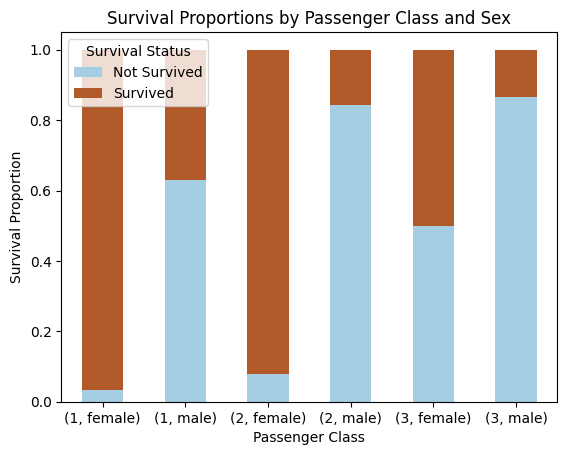

In [67]:
# Calculate survival proportions for different categories
survival_proportions = tt.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True).unstack()

# Create stacked bar plots
plt.figure(figsize=(8, 6))
survival_proportions.plot(kind='bar', stacked=True, colormap='Paired')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Proportion')
plt.title('Survival Proportions by Passenger Class and Sex')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()



*   As expected, we see that females survived more than males in all classes, with the survival rate gradually decreasing as class increases.



<Figure size 800x600 with 0 Axes>

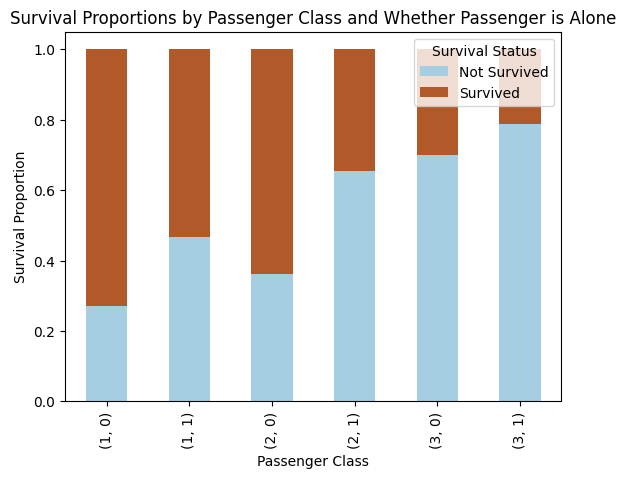

In [68]:
# Calculate survival proportions for different categories
survival_proportions = tt.groupby(['Pclass', 'Alone or Not'])['Survived'].value_counts(normalize=True).unstack()

# Create stacked bar plots
plt.figure(figsize=(8, 6))
survival_proportions.plot(kind='bar', stacked=True, colormap='Paired')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Proportion')
plt.title('Survival Proportions by Passenger Class and Whether Passenger is Alone')
plt.xticks(rotation= 'vertical')
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()

*   We see that passengers who boarded alone with no family members had a lower survival rate. This is quite surprising because I expected the opposite. My assumption was that a passenger who boarded alone did not have to worry about their loved ones and only focused on their survival.



<Figure size 800x600 with 0 Axes>

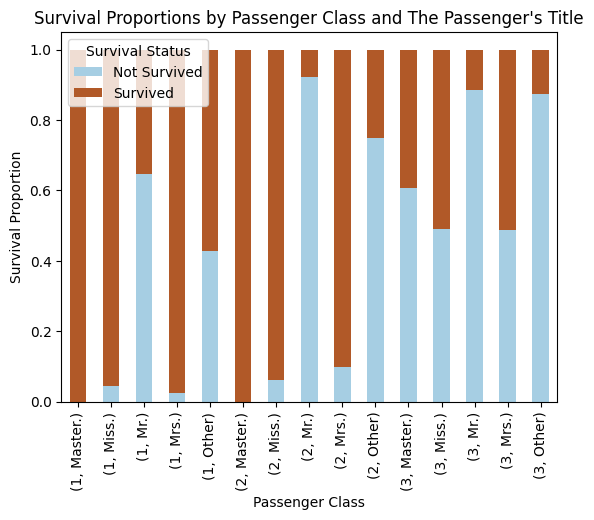

In [69]:
# Calculate survival proportions for different categories
survival_proportions = tt.groupby(['Pclass', 'Title'])['Survived'].value_counts(normalize=True).unstack()

# Create stacked bar plots
plt.figure(figsize=(8, 6))
survival_proportions.plot(kind='bar', stacked=True, colormap='Paired')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Proportion')
plt.title("Survival Proportions by Passenger Class and The Passenger's Title")
plt.xticks(rotation= 'vertical')
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()



*   This chart gives us the best insights on how social class affected survival rates.

*   Those with the title Master., had the best chance at survival with almost 100% survival in 1st and 2nd class. This means that most males that did survive had the title of Master.

*   As expected, those with the titles Miss. and Mrs. also had a good chance of survival and those with the titles Mr had the least chance of survival.





In [70]:
#Numeric values of the survival proportions by class and title
survival_proportions

Survived               0         1
Pclass Title                      
1      Master.       NaN  1.000000
       Miss.    0.043478  0.956522
       Mr.      0.647619  0.352381
       Mrs.     0.024390  0.975610
       Other    0.428571  0.571429
2      Master.       NaN  1.000000
       Miss.    0.060606  0.939394
       Mr.      0.921348  0.078652
       Mrs.     0.097561  0.902439
       Other    0.750000  0.250000
3      Master.  0.607143  0.392857
       Miss.    0.490000  0.510000
       Mr.      0.886364  0.113636
       Mrs.     0.487179  0.512821
       Other    0.875000  0.125000